Detector systematics for the ratio used in the truth study.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
import ROOT
from ROOT import TFile
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


Need to load in the detvar dicts.

In [2]:
def getDetvarDict(file):
    name_df = pd.read_csv(file)

    name = defaultdict(list)

    name = name_df.to_dict()


    poplist = []

    for c in name.keys():
        if len(name[c][0]) > 2:
            name[c][0] = name[c][0][1:]
            name[c][0] = name[c][0][:-1]
            name[c][0] = list(map(float,name[c][0].split(",")))
        else:
            poplist.append(c)

    for i in poplist:
        name.pop(i)

    pup = list(name.values())

    i = 0
    for c in name.keys():
        name[str(c)] = pup[i][0]
        i = i + 1
        
    return name

In [3]:
nue_detsys_detvar_dict_run1 = getDetvarDict("nue_detsys_detvar_dict_cut_run1_Sept19.csv")
nue_detsys_detvar_dict_run3 = getDetvarDict("nue_detsys_detvar_dict_cut_run3_Sept19.csv")

numu_detsys_detvar_dict_run1 = getDetvarDict("numu_detsys_detvar_dict_cut_run1_Sept19.csv")
numu_detsys_detvar_dict_run3 = getDetvarDict("numu_detsys_detvar_dict_cut_run3_Sept19.csv")

In [4]:
#https://docs.google.com/spreadsheets/d/1-4S0Ts2Lr6MkIo2FE9Mov6FeuZQ-q-qyNKQTLD7TApw/edit#gid=0
#Files are from here - New_run3 and New Run1 (intrinsic) and new_run1_highstats (overlay)

#These are high stats run 1
#Replace with numbers from extra stats calculation
detvar_run1_fhc = {
    "LYRayleigh": 7.60575E20, #Katrina 7.59732E20, #7.60573E20, 
    "LYDown": 7.43107E20, #Katrina 7.43109E20, 
    "SCE": 7.39879E20, #Katrina 7.39875E20, 
    "Recomb2": 7.59108E20, #Katrina 7.59105E20, 
    "WireModX": 7.64919E20, #Katrina 7.64918E20, 
    "WireModYZ": 7.53200E20, #Katrina 7.532E20, 
    "WireModThetaXZ": 7.64281E20, #Katrina 7.64282E20,
    "WireModThetaYZ_withSigmaSplines": 7.64541E20, #Katrina 7.64543E20, 
    "CV": 7.59735E20 #Katrina 7.59732E20
}

#These numbers are from "Pagina1" tan, the second ones from "Run1" tab
#Replace with numbers from Run1 tab
intrinsic_detvar_run1_fhc = {
    "LYRayleigh_intrinsic": 2.38081E+22, # Katrina 2.67655E22, #2.38081E22, 
    "LYDown_intrinsic": 2.24505E22, 
    "SCE_intrinsic": 2.39023E+22,  #Katrina 2.60685E22, #2.39023E22, 
    "Recomb2_intrinsic":  2.38193E+22,  #Katrina 2.60657E22, #2.38193E22, 
    "WireModX_intrinsic":  2.38318E+22,  #Katrina 2.66184E22, #2.38318E22, 
    "WireModYZ_intrinsic": 2.38416E+22,   #Katraina 2.62256E22, #2.38416E22,
    "WireModThetaXZ_intrinsic": 2.31518E+22, #Katrina 2.65175E22, #2.31518E22, 
    "WireModThetaYZ_withSigmaSplines_intrinsic": 2.31421E+22, #Katrina 2.62256E22, #2.31421E22, 
    "CV_intrinsic": 2.37261E+22 #Katrina 2.68294E22 #2.37261E22   
}

#from New_run3
detvar_run3_rhc = {
    "LYAttenuation": 3.31177E20, #checked
    "LYRayleigh":  3.15492E20, # 2.81E20, checked
    "LYDown": 3.23381E20, #checked 2.81E20, Katrina = 3.2338E20
    "SCE": 3.33283E20, #checked
    "Recomb2": 3.29538E20, #checked. Katrina = 3.29539E20
    "WireModX": 3.24286E20, #checked
    "WireModYZ": 3.36399E20, # checked
    "WireModThetaXZ": 3.20027E20, #checked
    "WireModThetaYZ_withSigmaSplines": 3.35762E20, #checked
    "CV": 2.87218E20 #checked. 2.72E20 Katrina = 2.87219E20
    
}

intrinsic_detvar_run3_rhc = {
    "LYAttenuation_intrinsic": 2.54177E+22, #2.54177E+22 - checked. Katrina - 2.5392E22
    "LYRayleigh_intrinsic": 2.53581E22,   #checked
    "LYDown_intrinsic": 2.53082E22, #checked
    "SCE_intrinsic": 2.54153E22,   #Checked
    "Recomb2_intrinsic": 2.54549E22,  #Checked
    "WireModX_intrinsic": 2.50092E22, #checked
    "WireModYZ_intrinsic": 2.54089E22,   #checked
    "WireModThetaXZ_intrinsic": 2.44365E22, #checked
    "WireModThetaYZ_withSigmaSplines_intrinsic":2.5992E22, #checked
    "CV_intrinsic": 2.5392E22   #Checked
    
}


In [5]:
standard_dict_run1 = detvar_run1_fhc
intrinsic_dict_run1 = intrinsic_detvar_run1_fhc
run_run1 = 'run1'
detvar_run1 = detvar_run1_fhc
standard_dict_run3 = detvar_run3_rhc
intrinsic_dict_run3 = intrinsic_detvar_run3_rhc
run_run3 = 'run3'
detvar_run3 = detvar_run3_rhc

Now can follow normal procedure but with a ratio.

In [6]:
#xvar = "reco_nu_vtx_sce_x"
#bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
xvar = "true_nu_vtx_x"
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225]
x_label = "True X Position [cm]"

xlow = bins[0]
xhigh = bins[-1]

x_err = [ round(abs(bins[x+1]-bins[x])/2, 3) for x in range(len(bins)-1) ]
bin_centers = []
for a in range(len(bins)-1): 
    bin_centers.append(round(bins[a] + (bins[a+1]-bins[a])/2, 3))

/tmp/ipykernel_6924/1110315128.py:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.hist(bin_centers, bins, histtype='step', weights=np.array(nue_detsys_detvar_dict_run1[variation+"_intrinsic"])/np.array(numu_detsys_detvar_dict_run1[variation+"_intrinsic"]),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/1110315128.py:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.hist(bin_centers, bins, histtype='step', weights=np.array(nue_detsys_detvar_dict_run1[variation+"_intrinsic"])/np.array(numu_detsys_detvar_dict_run1[variation+"_intrinsic"]),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/1110315128.py:17: 

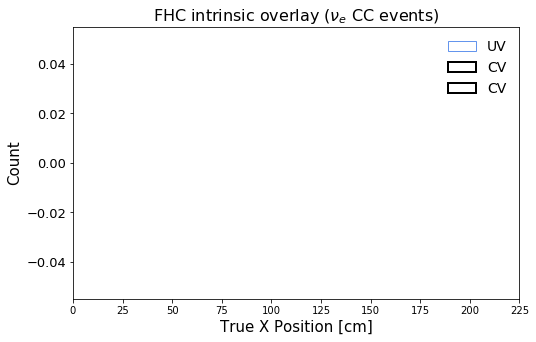

In [7]:
# nue CC variations - does not include LY Attentuation (RHC only)

n=0
fig = plt.figure(figsize=(8, 5)) 


for variation in detvar_run1_fhc.keys(): 
    
    if variation=='CV_intrinsic': 
        continue
        
    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=np.array(nue_detsys_detvar_dict_run1[variation+"_intrinsic"])/np.array(numu_detsys_detvar_dict_run1[variation+"_intrinsic"]), 
             linewidth=1, color='cornflowerblue', label='UV')
        
    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=np.array(nue_detsys_detvar_dict_run1[variation+"_intrinsic"])/np.array(numu_detsys_detvar_dict_run1[variation+"_intrinsic"]),
             linewidth=1, color='cornflowerblue')
        
    n+=1

plt.hist(bin_centers, bins, histtype='step', 
                 weights=np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), color='black', label='CV', linewidth=2)

current = (plt.hist(bin_centers, bins, histtype='step', 
                 weights=np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), color='black', label='CV', linewidth=2)[0])

plt.title('FHC intrinsic overlay ($\\nu_{e}$ CC events)', fontsize=16)

plt.ylabel('Count' , fontsize=15) # 2.68294E22
plt.xlabel(x_label, fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

plt.xlim(xlow, xhigh)
    
plt.show()

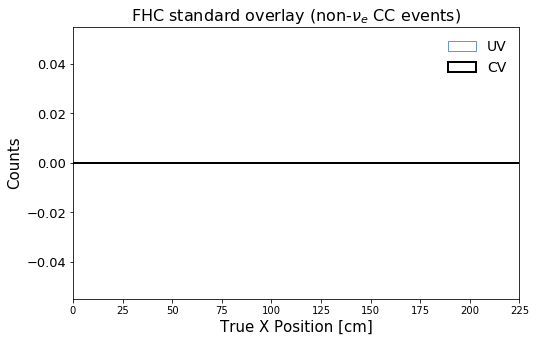

In [8]:
# nue CC variations - does not include LY Attentuation (RHC only)

n=0
fig = plt.figure(figsize=(8, 5)) 


for variation in detvar_run1_fhc.keys(): 
    
    if variation=='CV': 
        continue
        
    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=np.array(nue_detsys_detvar_dict_run1[variation])/np.array(numu_detsys_detvar_dict_run1[variation]), 
             linewidth=1, color='cornflowerblue', label='UV')
        
    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=np.array(nue_detsys_detvar_dict_run1[variation])/np.array(numu_detsys_detvar_dict_run1[variation]),
             linewidth=1, color='cornflowerblue')
        
    n+=1

plt.hist(bin_centers, bins, histtype='step', 
                 weights=np.array(nue_detsys_detvar_dict_run1['CV'])/np.array(numu_detsys_detvar_dict_run1['CV']), color='black', label='CV', linewidth=2)


plt.title('FHC standard overlay (non-$\\nu_{e}$ CC events)', fontsize=16)

plt.ylabel('Counts' , fontsize=15) # 7.59732E20+2.87219E20
plt.xlabel(x_label, fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

plt.xlim(xlow, xhigh)

    
plt.show()

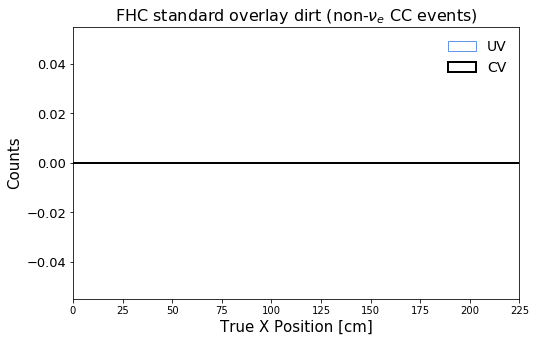

In [9]:
# nue CC dirt variations - does not include LY Attentuation (RHC only)

n=0
fig = plt.figure(figsize=(8, 5)) 


for variation in detvar_run1_fhc.keys(): 
    
    if variation=='CV': 
        continue
        
    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=np.array(nue_detsys_detvar_dict_run1[variation+"_dirt"])/np.array(numu_detsys_detvar_dict_run1[variation+"_dirt"]), 
             linewidth=1, color='cornflowerblue', label='UV')
        
    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=np.array(nue_detsys_detvar_dict_run1[variation+"_dirt"])/np.array(numu_detsys_detvar_dict_run1[variation+"_dirt"]),
             linewidth=1, color='cornflowerblue')
        
    n+=1

plt.hist(bin_centers, bins, histtype='step', 
                 weights=np.array(nue_detsys_detvar_dict_run1['CV_dirt'])/np.array(numu_detsys_detvar_dict_run1['CV_dirt']), color='black', label='CV', linewidth=2)


plt.title('FHC standard overlay dirt (non-$\\nu_{e}$ CC events)', fontsize=16)

plt.ylabel('Counts' , fontsize=15) # 7.59732E20+2.87219E20
plt.xlabel(x_label, fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

plt.xlim(xlow, xhigh)

plt.show()

In [10]:
def calcCov(var, bins, ncv_nu, ncv_total, uni_counts, plot=False, save=False, axis_label=None, pot=None, isrun3=False, xticks=None, xhigh=None): 
    
    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same  
    
    # compute the cov matrix 
    cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    
    N = len(uni_counts)
    print('number of universes = ', N)

    #####################################################
    
    for k in range(N): 
        
        uni = uni_counts[k]

        for i in range(len(bins)-1): 

            cvi = ncv_nu[i]
            uvi = uni[i]


            for j in range(len(bins)-1): 
                
                cvj = ncv_nu[j]
                uvj = uni[j]
        
                c = ((uvi - cvi)*(uvj - cvj)) / N

                cov[i][j] += c
                
                
                if ncv_total[i]*ncv_total[j] != 0: 
                    frac_cov[i][j] += c/(ncv_total[i]*ncv_total[j])
                    #frac_cov[i][j] = c/(ncv_total[i]*ncv_total[j])
            
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, cov, cmap='OrRd', edgecolors='k')
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)

        plt.title('Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
            print('saving to: '+save)
        plt.show()
        
        ##################################
        # fractional covariance 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, frac_cov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=.03)
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        plt.title('Fractional Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_frac_cov.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################    
    # compute the corr matrix 

    for i in range(len(cov)): 
        for j in range(len(cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))
            
            #print(cor[i][j])
    
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))

        plt.pcolor(bins, bins, cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
    

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])
            
        plt.title('Correlation Matrix', fontsize=16)
        if save: 
            plt.savefig(save+var+"_cor.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################
    
    # sys_err = [np.sqrt(x) for x in np.diagonal(cov)]
    # percent error = [y/z for y,z in zip(sys_err, ncv)] # w.r.t. to whatever event rate is being used (total or background subtracted)
        
    dictionary = {
        'cov' : cov, 
        'frac_cov' : frac_cov, 
        'cor' : cor,
        'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
    }
           
    return dictionary

In [11]:
# need to CV background subtract before computing the covariance

detsys_cov_fhc_run1 = {}
detsys_cov_fhc_run3 = {}

for variation in detvar_run1_fhc.keys(): 

    print(variation)

    if variation=='CV': 
        continue


    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same
    # so can just add in dirt with the others

    #Background subtracting reduces the values to zero
    detsys_cov_fhc_run1[variation] = calcCov(xvar, bins, 
                                        [(a+b+d)/(e+f+h) for a,b,c,d,e,f,g,h in zip(np.array(nue_detsys_detvar_dict_run1['CV_intrinsic']), np.array(nue_detsys_detvar_dict_run1['CV']), np.array(nue_detsys_detvar_dict_run1['cv_total_bkgd']), np.array(nue_detsys_detvar_dict_run1['CV_dirt']), np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), np.array(numu_detsys_detvar_dict_run1['CV']), np.array(numu_detsys_detvar_dict_run1['cv_total_bkgd']), np.array(numu_detsys_detvar_dict_run1['CV_dirt']))], 
                                        [(a+b+d)/(e+f+h) for a,b,c,d,e,f,g,h in zip(np.array(nue_detsys_detvar_dict_run1['CV_intrinsic']), np.array(nue_detsys_detvar_dict_run1['CV']), np.array(nue_detsys_detvar_dict_run1['cv_total_bkgd']), np.array(nue_detsys_detvar_dict_run1['CV_dirt']), np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), np.array(numu_detsys_detvar_dict_run1['CV']), np.array(numu_detsys_detvar_dict_run1['cv_total_bkgd']), np.array(numu_detsys_detvar_dict_run1['CV_dirt']))], 
                                        [ [(a+b+d)/(e+f+h) for a,b,c,d,e,f,g,h in zip(np.array(nue_detsys_detvar_dict_run1[variation+"_intrinsic"]), np.array(nue_detsys_detvar_dict_run1[variation]), np.array(nue_detsys_detvar_dict_run1['cv_total_bkgd']), np.array(nue_detsys_detvar_dict_run1[variation+"_dirt"]), np.array(numu_detsys_detvar_dict_run1[variation+"_intrinsic"]), np.array(numu_detsys_detvar_dict_run1[variation]), np.array(numu_detsys_detvar_dict_run1['cv_total_bkgd']), np.array(numu_detsys_detvar_dict_run1[variation+"_dirt"]))] ] )

    run1_CV = [(a+b+d)/(e+f+h) for a,b,c,d,e,f,g,h in zip(np.array(nue_detsys_detvar_dict_run1['CV_intrinsic']), np.array(nue_detsys_detvar_dict_run1['CV']), np.array(nue_detsys_detvar_dict_run1['cv_total_bkgd']), np.array(nue_detsys_detvar_dict_run1['CV_dirt']), np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), np.array(numu_detsys_detvar_dict_run1['CV']), np.array(numu_detsys_detvar_dict_run1['cv_total_bkgd']), np.array(numu_detsys_detvar_dict_run1['CV_dirt']))]

for variation in detvar_run3_rhc.keys(): 

    print(variation)

    if variation=='CV': 
        continue


    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same
    # so can just add in dirt with the others

    #Background subtracting reduces the values to zero
    detsys_cov_fhc_run3[variation] = calcCov(xvar, bins, 
                                        [(a+b+d)/(e+f+h) for a,b,c,d,e,f,g,h in zip(np.array(nue_detsys_detvar_dict_run3['CV_intrinsic']), np.array(nue_detsys_detvar_dict_run3['CV']), np.array(nue_detsys_detvar_dict_run3['cv_total_bkgd']), np.array(nue_detsys_detvar_dict_run3['CV_dirt']), np.array(numu_detsys_detvar_dict_run3['CV_intrinsic']), np.array(numu_detsys_detvar_dict_run3['CV']), np.array(numu_detsys_detvar_dict_run3['cv_total_bkgd']), np.array(numu_detsys_detvar_dict_run3['CV_dirt']))], 
                                        [(a+b+d)/(e+f+h) for a,b,c,d,e,f,g,h in zip(np.array(nue_detsys_detvar_dict_run3['CV_intrinsic']), np.array(nue_detsys_detvar_dict_run3['CV']), np.array(nue_detsys_detvar_dict_run3['cv_total_bkgd']), np.array(nue_detsys_detvar_dict_run3['CV_dirt']), np.array(numu_detsys_detvar_dict_run3['CV_intrinsic']), np.array(numu_detsys_detvar_dict_run3['CV']), np.array(numu_detsys_detvar_dict_run3['cv_total_bkgd']), np.array(numu_detsys_detvar_dict_run3['CV_dirt']))], 
                                        [ [(a+b+d)/(e+f+h) for a,b,c,d,e,f,g,h in zip(np.array(nue_detsys_detvar_dict_run3[variation+"_intrinsic"]), np.array(nue_detsys_detvar_dict_run3[variation]), np.array(nue_detsys_detvar_dict_run3['cv_total_bkgd']), np.array(nue_detsys_detvar_dict_run3[variation+"_dirt"]), np.array(numu_detsys_detvar_dict_run3[variation+"_intrinsic"]), np.array(numu_detsys_detvar_dict_run3[variation]), np.array(numu_detsys_detvar_dict_run3['cv_total_bkgd']), np.array(numu_detsys_detvar_dict_run3[variation+"_dirt"]))] ] )

    run3_CV = [(a+b+d)/(e+f+h) for a,b,c,d,e,f,g,h in zip(np.array(nue_detsys_detvar_dict_run3['CV_intrinsic']), np.array(nue_detsys_detvar_dict_run3['CV']), np.array(nue_detsys_detvar_dict_run3['cv_total_bkgd']), np.array(nue_detsys_detvar_dict_run3['CV_dirt']), np.array(numu_detsys_detvar_dict_run3['CV_intrinsic']), np.array(numu_detsys_detvar_dict_run3['CV']), np.array(numu_detsys_detvar_dict_run3['cv_total_bkgd']), np.array(numu_detsys_detvar_dict_run3['CV_dirt']))]


LYRayleigh
number of universes =  1
LYDown
number of universes =  1
SCE
number of universes =  1
Recomb2
number of universes =  1
WireModX
number of universes =  1
WireModYZ
number of universes =  1
WireModThetaXZ
number of universes =  1
WireModThetaYZ_withSigmaSplines
number of universes =  1
CV
LYAttenuation
number of universes =  1
LYRayleigh
number of universes =  1
LYDown
number of universes =  1
SCE
number of universes =  1
Recomb2
number of universes =  1
WireModX
number of universes =  1
WireModYZ
number of universes =  1
WireModThetaXZ
number of universes =  1
WireModThetaYZ_withSigmaSplines
number of universes =  1
CV


In [12]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

comb_CV = np.array(run1_CV) + np.array(run3_CV)
print(len(run1_CV))
print(len(comb_CV))

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):


        cov[i][j] = sum([detsys_cov_fhc_run1[x]['cov'][i][j] for x in detvar_run1_fhc.keys() if x is not 'CV'])
        cov[i][j] += sum([detsys_cov_fhc_run3[x]['cov'][i][j] for x in detvar_run3_rhc.keys() if x is not 'CV'])
        frac_cov[i][j] = cov[i][j]/(comb_CV[i]*comb_CV[j])

# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_comb = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
}

9
9


<>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_6924/885048653.py:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_cov_fhc_run1[x]['cov'][i][j] for x in detvar_run1_fhc.keys() if x is not 'CV'])
/tmp/ipykernel_6924/885048653.py:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] += sum([detsys_cov_fhc_run3[x]['cov'][i][j] for x in detvar_run3_rhc.keys() if x is not 'CV'])


In [13]:
detsys_dict_comb['fractional_uncertainty']

array([0.038679  , 0.01796926, 0.02007244, 0.01502782, 0.01653583,
       0.02673218, 0.02299626, 0.02563637, 0.03225374])

In [14]:
detsys_dict_comb['cov']

[[4.8712188898410235e-06,
  -1.517164865933461e-06,
  -1.928889816925157e-06,
  3.2967458727710633e-07,
  1.7136781314683965e-06,
  2.7565086867471078e-06,
  -1.186744039848232e-06,
  -2.418824460002868e-06,
  -3.3435622684268898e-06],
 [-1.517164865933461e-06,
  9.002245763751935e-07,
  7.832473905236711e-07,
  -1.5897770724329333e-07,
  -5.729603414796733e-07,
  -1.051771085276541e-06,
  5.236491573259659e-07,
  1.1165312046169573e-06,
  1.31636612207165e-06],
 [-1.928889816925157e-06,
  7.832473905236711e-07,
  1.2390643380419414e-06,
  -3.5124462042465975e-07,
  -8.173966528894603e-07,
  -1.1052806672381699e-06,
  1.024815339651682e-06,
  1.2720871839035108e-06,
  1.727327760130944e-06],
 [3.2967458727710633e-07,
  -1.5897770724329333e-07,
  -3.5124462042465975e-07,
  6.373638725107489e-07,
  1.436739062509728e-07,
  3.8080687290613564e-07,
  -2.8132218913365813e-07,
  -3.3961410736940354e-07,
  -5.774471182216434e-07],
 [1.7136781314683965e-06,
  -5.729603414796733e-07,
  -8.17396

In [15]:
#detsys_err = np.sqrt( np.diag((detsys_dict['cov'])))
#varience
detsys_err = ( np.diag((detsys_dict_comb['cov'])))
print(detsys_err)

[4.87121889e-06 9.00224576e-07 1.23906434e-06 6.37363873e-07
 8.54807281e-07 2.27070545e-06 1.61632974e-06 1.88704840e-06
 3.10300976e-06]


Text(0.5, 1.0, 'Combined Detector Systematics')

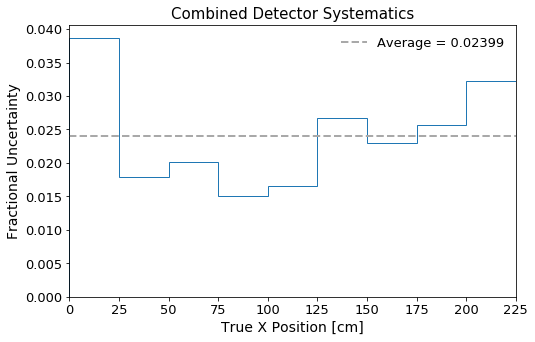

In [16]:
#####################
######COMB - POS############
#####################


x_err = [ round(abs(bins[x+1]-bins[x])/2, 3) for x in range(len(bins)-1) ]

plt.figure(figsize=(8, 5))


plt.hist(bin_centers, bins, weights=detsys_dict_comb['fractional_uncertainty'], histtype='step')

plt.hlines(np.average(detsys_dict_comb['fractional_uncertainty']), 0, 250, linestyle='--', color='darkgray', linewidth=2,
           label='Average = '+str(round(np.average(detsys_dict_comb['fractional_uncertainty']), 5)))

plt.xlim(xlow, xhigh)
#plt.xlim(0, 5)
#plt.ylim(0, 1)

plt.legend(fontsize=13,  frameon=False)

plt.xlabel(x_label, fontsize=14)
plt.ylabel("Fractional Uncertainty", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Combined Detector Systematics", fontsize=15)



## Intrinsic

/tmp/ipykernel_6924/2973182257.py:6: RuntimeWarning: divide by zero encountered in true_divide
  range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/2973182257.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')


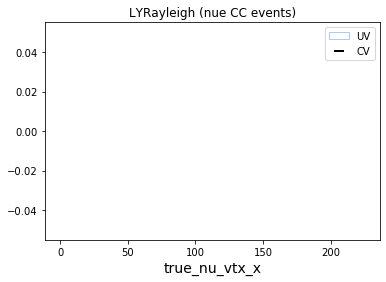

/tmp/ipykernel_6924/2973182257.py:6: RuntimeWarning: divide by zero encountered in true_divide
  range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/2973182257.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')


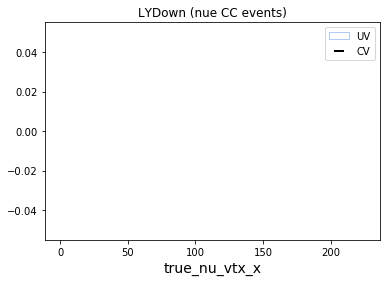

/tmp/ipykernel_6924/2973182257.py:6: RuntimeWarning: divide by zero encountered in true_divide
  range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/2973182257.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')


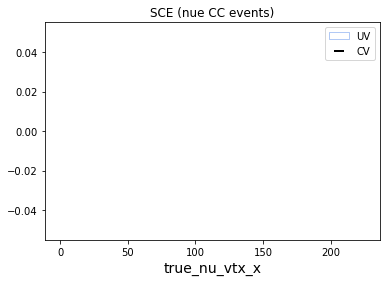

/tmp/ipykernel_6924/2973182257.py:6: RuntimeWarning: divide by zero encountered in true_divide
  range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/2973182257.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')


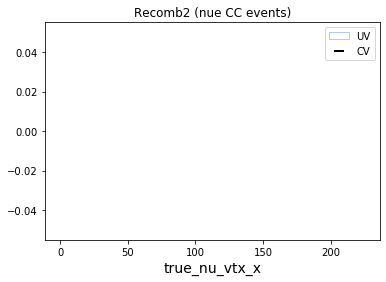

/tmp/ipykernel_6924/2973182257.py:6: RuntimeWarning: divide by zero encountered in true_divide
  range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/2973182257.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')


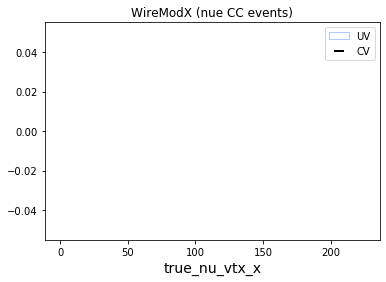

/tmp/ipykernel_6924/2973182257.py:6: RuntimeWarning: divide by zero encountered in true_divide
  range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/2973182257.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')


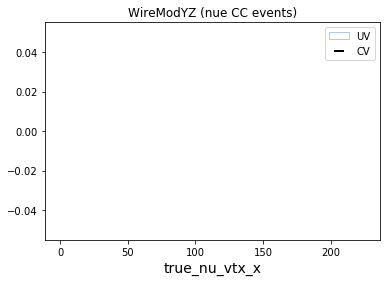

/tmp/ipykernel_6924/2973182257.py:6: RuntimeWarning: divide by zero encountered in true_divide
  range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/2973182257.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')


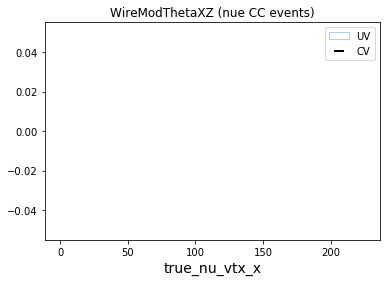

/tmp/ipykernel_6924/2973182257.py:6: RuntimeWarning: divide by zero encountered in true_divide
  range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']),
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_6924/2973182257.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')


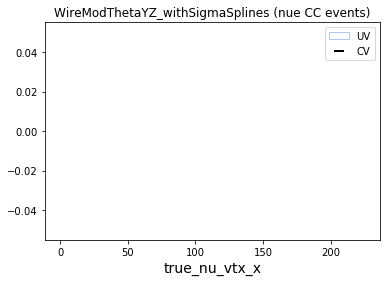

In [17]:
for variation in detvar_run1:   
    if variation=='CV': 
        continue
    
    plt.hist(bin_centers, bins, histtype='step', 
                        range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic']), 
                        color='cornflowerblue', linewidth=0.5, label='UV')
    
    plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')
    plt.xlabel(xvar, fontsize=14)
    #plt.ylabel('$\\nu$ / '+str(beamon_pot)+' POT', fontsize=14)
    plt.title(variation+' (nue CC events)')
    plt.legend()
    plt.show()

In [18]:
detsys_cov_nueCC_run1 = {}
detsys_cov_nueCC_run3 = {}


for variation in detvar_run1.keys(): 

    if variation=='CV': 
        continue

    detsys_cov_nueCC_run1[variation+"_to_nueCC"] = calcCov(xvar, bins, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), 
                                              np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']), 
                                              [np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic'])])

run1_CV = np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic'])

for variation in detvar_run3.keys(): 

    if variation=='CV': 
        continue

    detsys_cov_nueCC_run3[variation+"_to_nueCC"] = calcCov(xvar, bins, np.array(nue_detsys_detvar_dict_run3['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run3['CV_intrinsic']), 
                                              np.array(nue_detsys_detvar_dict_run3['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run3['CV_intrinsic']), 
                                              [np.array(nue_detsys_detvar_dict_run3[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run3[variation+'_intrinsic'])])

run3_CV = np.array(nue_detsys_detvar_dict_run3['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run3['CV_intrinsic'])

/tmp/ipykernel_6924/42739133.py:10: RuntimeWarning: divide by zero encountered in true_divide
  detsys_cov_nueCC_run1[variation+"_to_nueCC"] = calcCov(xvar, bins, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']),
/tmp/ipykernel_6924/42739133.py:11: RuntimeWarning: divide by zero encountered in true_divide
  np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.array(numu_detsys_detvar_dict_run1['CV_intrinsic']),
/tmp/ipykernel_6924/42739133.py:12: RuntimeWarning: divide by zero encountered in true_divide
  [np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/np.array(numu_detsys_detvar_dict_run1[variation+'_intrinsic'])])
/tmp/ipykernel_6924/3364834053.py:32: RuntimeWarning: invalid value encountered in double_scalars
  c = ((uvi - cvi)*(uvj - cvj)) / N
/tmp/ipykernel_6924/42739133.py:14: RuntimeWarning: divide by zero encountered in true_divide
  run1_CV = np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/np.

number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1


In [19]:
comb_CV = np.array(run1_CV) + np.array(run3_CV)
#comb_CV = np.array(run3_CV)
print(len(run1_CV))
print(len(comb_CV))

for i in range(len(bins)-1): 
        for j in range(len(bins)-1):

            cov[i][j] = sum([detsys_cov_nueCC_run1[x+"_to_nueCC"]['cov'][i][j] for x in detvar_run1.keys() if x is not 'CV'])
            cov[i][j] += sum([detsys_cov_nueCC_run3[x+"_to_nueCC"]['cov'][i][j] for x in detvar_run3.keys() if x is not 'CV'])
            frac_cov[i][j] = cov[i][j]/(comb_CV[i]*comb_CV[j])

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

nueCC_detsys_dict_comb = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'cor' : cor,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
} 

nueCC_detsys_dict_comb['fractional_uncertainty']

9
9


<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_6924/15352994.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_cov_nueCC_run1[x+"_to_nueCC"]['cov'][i][j] for x in detvar_run1.keys() if x is not 'CV'])
/tmp/ipykernel_6924/15352994.py:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] += sum([detsys_cov_nueCC_run3[x+"_to_nueCC"]['cov'][i][j] for x in detvar_run3.keys() if x is not 'CV'])


array([nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [20]:
nueCC_detsys_err = ( np.diag((nueCC_detsys_dict_comb['cov'])))
print(nueCC_detsys_err)

[nan nan nan nan nan nan nan nan nan]


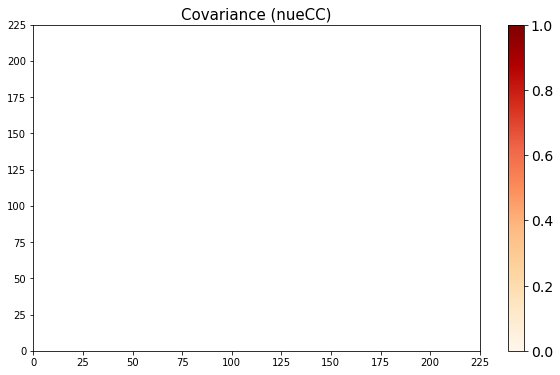

In [21]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nueCC_detsys_dict_comb['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance (nueCC)', fontsize=15)

plt.show()

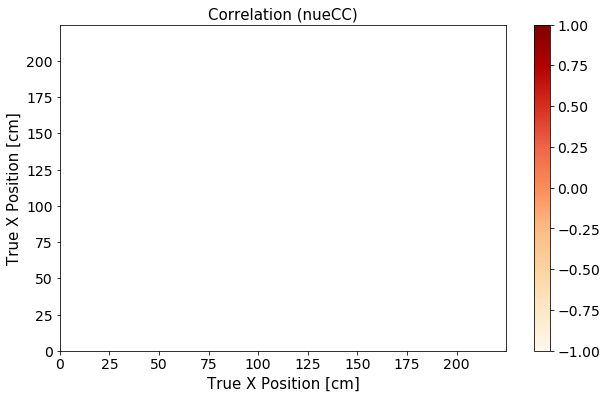

In [22]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nueCC_detsys_dict_comb['cor'], cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

        
plt.xticks(bins[:-1], fontsize=14)
plt.yticks(bins[:-1], fontsize=14)


plt.xlabel(x_label, fontsize=15)
plt.ylabel(x_label, fontsize=15)

plt.title('Correlation (nueCC)', fontsize=15)

plt.show()

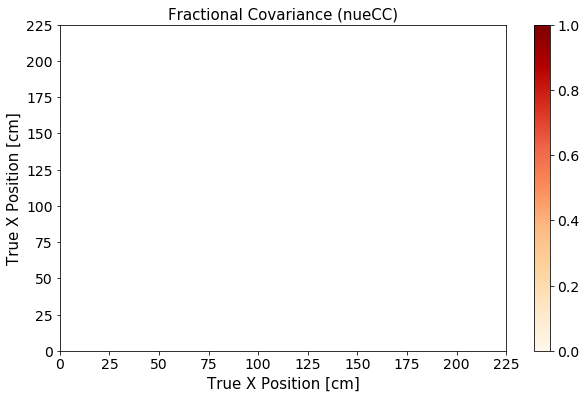

In [23]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nueCC_detsys_dict_comb['frac_cov'], cmap='OrRd', edgecolors='k')#, vmin=-0.1, vmax=0.1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

        
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.xlabel(x_label, fontsize=15)
plt.ylabel(x_label, fontsize=15)

plt.title('Fractional Covariance (nueCC)', fontsize=15)

plt.show()

/tmp/ipykernel_6924/3467092605.py:10: RuntimeWarning: invalid value encountered in double_scalars
  cv_cut_err = [np.sqrt(x)/x for x in cv_cut]


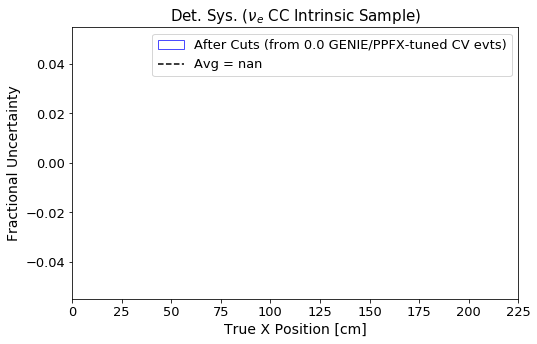

In [24]:
x_err = [ round(abs(bins[x+1]-bins[x])/2, 3) for x in range(len(bins)-1) ]

#df_intrinsic['pot_scale'] = beamon_pot_run1/intrinsic_dict_run1.get(variation+'_intrinsic')
beamon_pot_run1_cv_int = 2e+20/2.37261E+22
beamon_pot_run3_cv_int = 5.014e+20/2.5392E22

cv_cut = (np.array(nue_detsys_detvar_dict_run1['CV'])/beamon_pot_run1_cv_int)/(np.array(numu_detsys_detvar_dict_run1['CV'])/beamon_pot_run1_cv_int)
cv_cut += (np.array(nue_detsys_detvar_dict_run3['CV'])/beamon_pot_run3_cv_int)/(np.array(numu_detsys_detvar_dict_run3['CV'])/beamon_pot_run3_cv_int)

cv_cut_err = [np.sqrt(x)/x for x in cv_cut]

plt.figure(figsize=(8, 5))

plt.errorbar(bin_centers, nueCC_detsys_dict_comb['fractional_uncertainty'], fmt='none', 
                 yerr=cv_cut_err, 
                 color='blue', alpha=0.7)

plt.hist(bin_centers, bins, weights=nueCC_detsys_dict_comb['fractional_uncertainty'], histtype='step', 
         label='After Cuts (from '+str(round(sum(cv_cut),1))+' GENIE/PPFX-tuned CV evts)', color='blue',alpha=0.7)

plt.hlines(np.average(nueCC_detsys_dict_comb['fractional_uncertainty']), bins[0], bins[-1], linestyle='--', 
           label='Avg = '+str(round(np.average(nueCC_detsys_dict_comb['fractional_uncertainty']), 3)))

plt.xlim(bins[0], bins[-1])
#plt.ylim(0, 0.4)

plt.legend(fontsize=13)

plt.xlabel(x_label, fontsize=14)
plt.ylabel("Fractional Uncertainty", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title("Det. Sys. ($\\nu_{e}$ CC Intrinsic Sample)", fontsize=15)
#plt.savefig(parameters(ISRUN3)['plots_path']+"RHCRUN3DetSys.pdf", transparent=True, bbox_inches='tight') 

plt.show()

### Standard

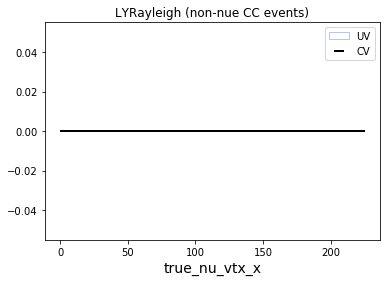

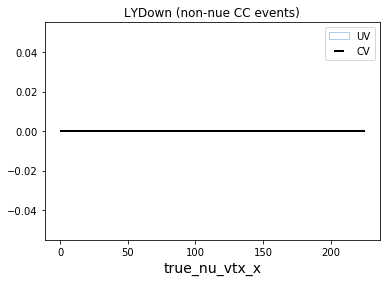

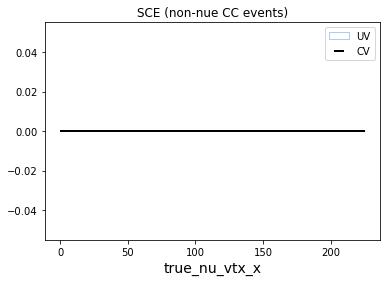

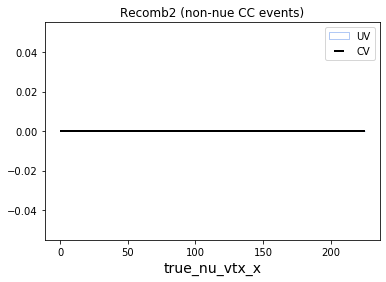

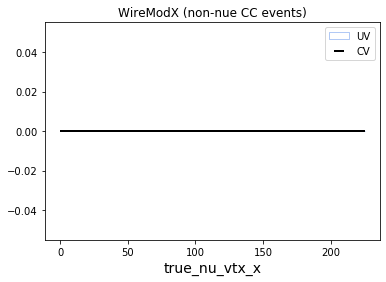

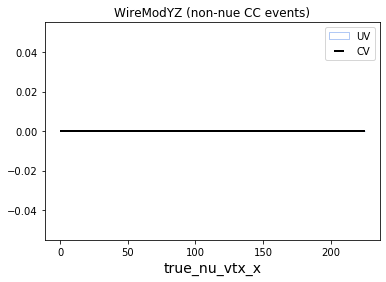

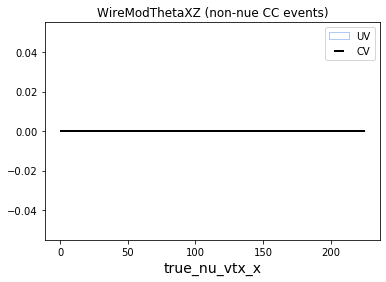

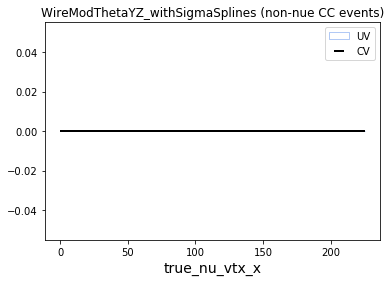

In [25]:
for variation in detvar_run1: 
    
    if variation=='CV': 
        continue
    
    plt.hist(bin_centers, bins, histtype='step', 
                        range=[bins[0], bins[-1]], weights=np.array(nue_detsys_detvar_dict_run1[variation])/np.array(numu_detsys_detvar_dict_run1[variation]), 
                        color='cornflowerblue', linewidth=0.5, label='UV')
    
    plt.errorbar(bin_centers, np.array(nue_detsys_detvar_dict_run1['CV'])/np.array(numu_detsys_detvar_dict_run1['CV']), 
                 xerr=x_err, fmt='none', color='black', linewidth=2, label='CV')
    plt.xlabel(xvar, fontsize=14)
    #plt.ylabel('$\\nu$ / '+str(beamon_pot_run1)+' POT', fontsize=14)
    plt.title(variation+' (non-nue CC events)')
    plt.legend()
    plt.show()

In [26]:
detsys_cov_non_nueCC_run1 = {}
detsys_cov_non_nueCC_run3 = {}

for variation in detvar_run1.keys(): 

    if variation=='CV': 
        continue

    # calc covariance for each unisim - fractional uncertainty WRT nonnueCC 
    detsys_cov_non_nueCC_run1[variation] = calcCov(xvar, bins, np.array(nue_detsys_detvar_dict_run1['CV'])/np.array(numu_detsys_detvar_dict_run1['CV']), 
                                              np.array(nue_detsys_detvar_dict_run1['CV'])/np.array(numu_detsys_detvar_dict_run1['CV']), 
                                              [np.array(nue_detsys_detvar_dict_run1[variation])/np.array(numu_detsys_detvar_dict_run1[variation])])

run1_CV = np.array(nue_detsys_detvar_dict_run1['CV'])/np.array(numu_detsys_detvar_dict_run1['CV'])

for variation in detvar_run3.keys(): 

    if variation=='CV': 
        continue

    # calc covariance for each unisim - fractional uncertainty WRT nonnueCC 
    detsys_cov_non_nueCC_run3[variation] = calcCov(xvar, bins, np.array(nue_detsys_detvar_dict_run3['CV'])/np.array(numu_detsys_detvar_dict_run3['CV']), 
                                              np.array(nue_detsys_detvar_dict_run3['CV'])/np.array(numu_detsys_detvar_dict_run3['CV']), 
                                              [np.array(nue_detsys_detvar_dict_run3[variation])/np.array(numu_detsys_detvar_dict_run3[variation])])

run3_CV = np.array(nue_detsys_detvar_dict_run3['CV'])/np.array(numu_detsys_detvar_dict_run3['CV'])

number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1


In [27]:
comb_CV = np.array(run1_CV) + np.array(run3_CV)
print(comb_CV)

for i in range(len(bins)-1): 
        for j in range(len(bins)-1):

            cov[i][j] = sum([detsys_cov_non_nueCC_run1[x]['cov'][i][j] for x in detvar_run1.keys() if x is not 'CV'])
            cov[i][j] += sum([detsys_cov_non_nueCC_run3[x]['cov'][i][j] for x in detvar_run3.keys() if x is not 'CV'])
            frac_cov[i][j] = cov[i][j]/(comb_CV[i]*comb_CV[j])

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

non_nueCC_detsys_dict_comb = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'cor' : cor,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
}

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_6924/2868119797.py:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_cov_non_nueCC_run1[x]['cov'][i][j] for x in detvar_run1.keys() if x is not 'CV'])
/tmp/ipykernel_6924/2868119797.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] += sum([detsys_cov_non_nueCC_run3[x]['cov'][i][j] for x in detvar_run3.keys() if x is not 'CV'])
/tmp/ipykernel_6924/2868119797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  frac_cov[i][j] = cov[i][j]/(comb_CV[i]*comb_CV[j])


In [28]:
non_nueCC_detsys_dict_comb['fractional_uncertainty']

array([nan, nan, nan, nan, nan, nan, nan, nan, nan])

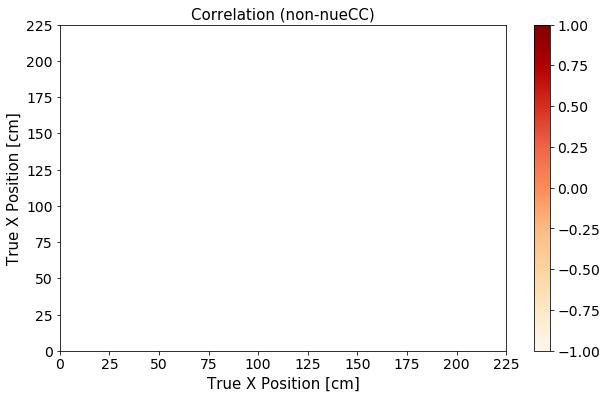

In [29]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, non_nueCC_detsys_dict_comb['cor'], cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

        
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)



plt.xlabel(x_label, fontsize=15)
plt.ylabel(x_label, fontsize=15)

plt.title('Correlation (non-nueCC)', fontsize=15)

plt.show()

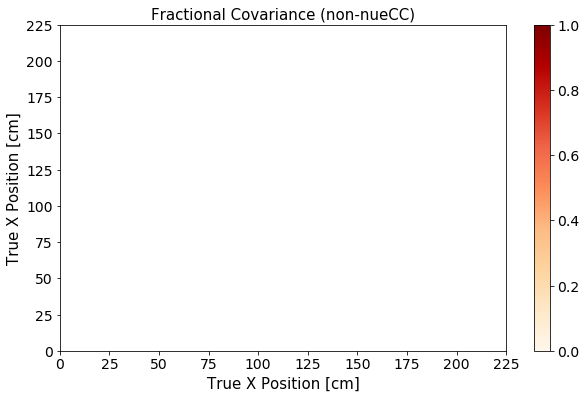

In [30]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, non_nueCC_detsys_dict_comb['frac_cov'], cmap='OrRd', edgecolors='k')#, vmin=-0.1, vmax=0.1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

        
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.xlabel(x_label, fontsize=15)
plt.ylabel(x_label, fontsize=15)

plt.title('Fractional Covariance (non-nueCC)', fontsize=15)

plt.show()

/tmp/ipykernel_6924/3890792400.py:9: RuntimeWarning: invalid value encountered in double_scalars
  cv_cut_err = [np.sqrt(x)/x for x in cv_cut]


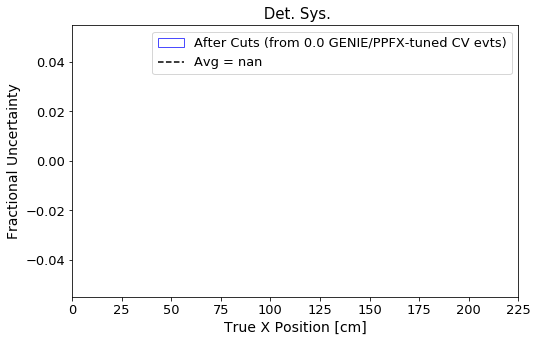

In [31]:
x_err = [ round(abs(bins[x+1]-bins[x])/2, 3) for x in range(len(bins)-1) ]

beamon_pot_run1_cv_std = 2e+20/7.59735E20 
beamon_pot_run3_cv_std = 5.014e+20/2.87218E20

cv_cut = np.array(nue_detsys_detvar_dict_run1['CV'])/beamon_pot_run1_cv_int/np.array(numu_detsys_detvar_dict_run1['CV'])/beamon_pot_run1_cv_int
cv_cut += np.array(nue_detsys_detvar_dict_run3['CV'])/beamon_pot_run3_cv_int/np.array(numu_detsys_detvar_dict_run3['CV'])/beamon_pot_run3_cv_int

cv_cut_err = [np.sqrt(x)/x for x in cv_cut]

plt.figure(figsize=(8, 5))

plt.errorbar(bin_centers, non_nueCC_detsys_dict_comb['fractional_uncertainty'], fmt='none', 
                 yerr=cv_cut_err, 
                 color='blue', alpha=0.7)

plt.hist(bin_centers, bins, weights=non_nueCC_detsys_dict_comb['fractional_uncertainty'], histtype='step', 
         label='After Cuts (from '+str(round(sum(cv_cut),1))+' GENIE/PPFX-tuned CV evts)', color='blue',alpha=0.7)

plt.hlines(np.average(non_nueCC_detsys_dict_comb['fractional_uncertainty']), bins[0], bins[-1], linestyle='--', 
           label='Avg = '+str(round(np.average(non_nueCC_detsys_dict_comb['fractional_uncertainty']), 3)))

plt.xlim(bins[0], bins[-1])
#plt.ylim(0, 0.4)

plt.legend(fontsize=13)

plt.xlabel(x_label, fontsize=14)
plt.ylabel("Fractional Uncertainty", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(" Det. Sys.", fontsize=15)

plt.show()

## Cross values

Use Intrinsic for nue and Standard for numu

In [32]:
detsys_cov_cross_run1 = {}
detsys_cov_cross_run3 = {}

for variation in detvar_run1.keys(): 

    if variation=='CV': 
        continue

    # calc covariance for each unisim - fractional uncertainty WRT nonnueCC 
    detsys_cov_cross_run1[variation] = calcCov(xvar, bins, np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/(np.array(numu_detsys_detvar_dict_run1['CV'])+np.array(numu_detsys_detvar_dict_run1['CV_dirt'])), 
                                              np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/(np.array(numu_detsys_detvar_dict_run1['CV'])+np.array(numu_detsys_detvar_dict_run1['CV_dirt'])), 
                                              [np.array(nue_detsys_detvar_dict_run1[variation+'_intrinsic'])/(np.array(numu_detsys_detvar_dict_run1[variation])+np.array(numu_detsys_detvar_dict_run1[variation+'_dirt']))])

run1_CV = np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/(np.array(numu_detsys_detvar_dict_run1['CV'])+np.array(numu_detsys_detvar_dict_run1['CV_dirt']))

for variation in detvar_run3.keys(): 

    if variation=='CV': 
        continue

    # calc covariance for each unisim - fractional uncertainty WRT nonnueCC 
    detsys_cov_cross_run3[variation] = calcCov(xvar, bins, np.array(nue_detsys_detvar_dict_run3['CV_intrinsic'])/(np.array(numu_detsys_detvar_dict_run3['CV'])+np.array(numu_detsys_detvar_dict_run3['CV_dirt'])), 
                                              np.array(nue_detsys_detvar_dict_run3['CV_intrinsic'])/(np.array(numu_detsys_detvar_dict_run3['CV'])+np.array(numu_detsys_detvar_dict_run3['CV_dirt'])), 
                                              [np.array(nue_detsys_detvar_dict_run3[variation+'_intrinsic'])/(np.array(numu_detsys_detvar_dict_run3[variation])+np.array(numu_detsys_detvar_dict_run3[variation+'_dirt']))])

run3_CV = np.array(nue_detsys_detvar_dict_run3['CV_intrinsic'])/(np.array(numu_detsys_detvar_dict_run3['CV'])+np.array(numu_detsys_detvar_dict_run3['CV_dirt']))

number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1
number of universes =  1


In [33]:
detsys_cov_cross_run1.keys()

dict_keys(['LYRayleigh', 'LYDown', 'SCE', 'Recomb2', 'WireModX', 'WireModYZ', 'WireModThetaXZ', 'WireModThetaYZ_withSigmaSplines'])

In [34]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

comb_CV = np.array(run1_CV) + np.array(run3_CV)
print(comb_CV)

for i in range(len(bins)-1): 
        for j in range(len(bins)-1):

            cov[i][j] = sum([detsys_cov_cross_run1[x]['cov'][i][j] for x in detvar_run1.keys() if x is not 'CV'])
            cov[i][j] += sum([detsys_cov_cross_run3[x]['cov'][i][j] for x in detvar_run3.keys() if x is not 'CV'])
            frac_cov[i][j] = cov[i][j]/(comb_CV[i]*comb_CV[j])

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

cross_detsys_dict_comb = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'cor' : cor,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
}

[0.05706155 0.05280138 0.05545577 0.05312486 0.05591239 0.05636973
 0.05528505 0.05358399 0.05461494]


<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:12: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:12: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_6924/3150796125.py:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_cov_cross_run1[x]['cov'][i][j] for x in detvar_run1.keys() if x is not 'CV'])
/tmp/ipykernel_6924/3150796125.py:12: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] += sum([detsys_cov_cross_run3[x]['cov'][i][j] for x in detvar_run3.keys() if x is not 'CV'])


In [35]:
cross_detsys_dict_comb['fractional_uncertainty']

array([0.038679  , 0.01796926, 0.02007244, 0.01502782, 0.01653583,
       0.02673218, 0.02299626, 0.02563637, 0.03225374])

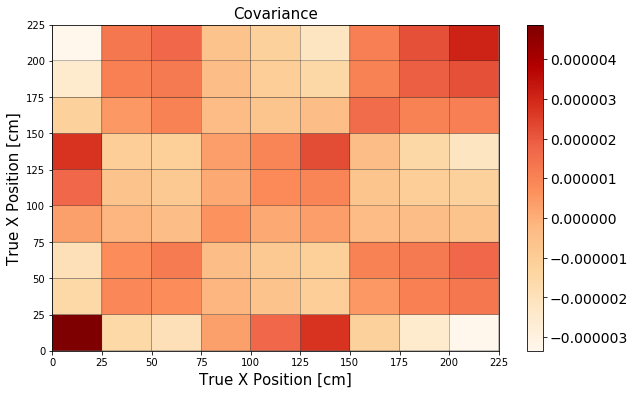

In [36]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, cross_detsys_dict_comb['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel(x_label, fontsize=15)
plt.ylabel(x_label, fontsize=15)


plt.title('Covariance', fontsize=15)

plt.savefig("Ratio_Full_Detsys_TrueX_Cov.svg", bbox_inches='tight')

plt.show()

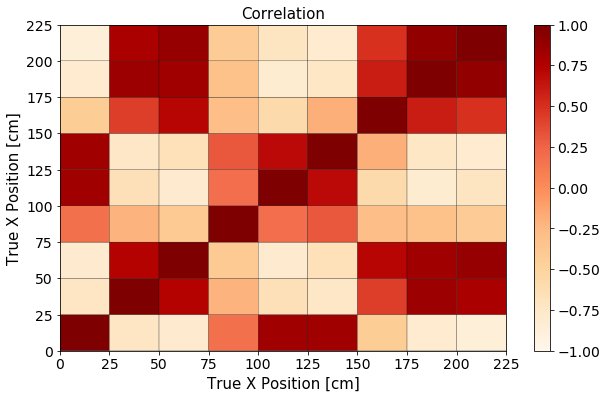

In [37]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, cross_detsys_dict_comb['cor'], cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

        
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)



plt.xlabel(x_label, fontsize=15)
plt.ylabel(x_label, fontsize=15)

plt.title('Correlation', fontsize=15)

plt.savefig("Ratio_Full_Detsys_TrueX_Cor.svg", bbox_inches='tight')

plt.show()

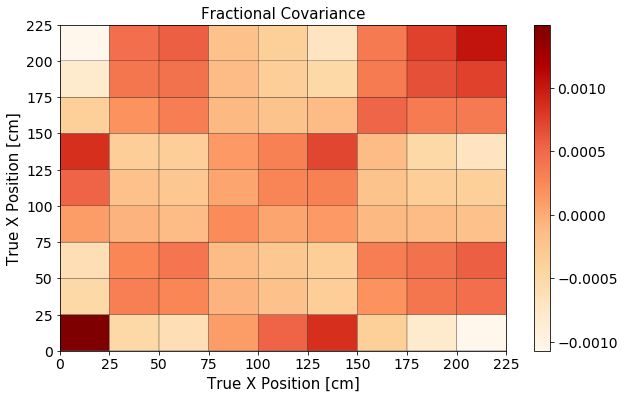

In [38]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, cross_detsys_dict_comb['frac_cov'], cmap='OrRd', edgecolors='k')#, vmin=-0.1, vmax=0.1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

        
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.xlabel(x_label, fontsize=15)
plt.ylabel(x_label, fontsize=15)

plt.title('Fractional Covariance', fontsize=15)

plt.savefig("Ratio_Full_Detsys_TrueX_FracCov.svg", bbox_inches='tight')

plt.show()

19.836320227945826
[0.6631197907751116, 0.6868155429496022, 0.670989823128981, 0.6847449163291223, 0.6699915033519042, 0.6636412281358968, 0.6715036211039846, 0.6787058640614795, 0.673965565616802]
[ 6202.81251236 10176.55069355 10228.35414603 10226.46266527
 10113.67049898 10270.59436067 10055.67550642  9831.70756092
  9991.01360248]
[2727.54945292 4800.43761495 4605.0847078  4794.93882254 4539.91153844
 4523.37187847 4534.27617019 4528.89399231 4538.21394877]
[1.66294219e-05 6.69996609e-06 7.42465793e-06 6.74638615e-06
 7.60489988e-06 7.77571527e-06 7.58908924e-06 7.46275317e-06
 7.53095327e-06]


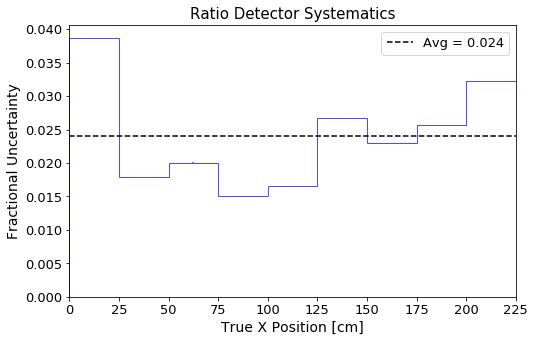

In [40]:
x_err = [ round(abs(bins[x+1]-bins[x])/2, 3) for x in range(len(bins)-1) ]

beamon_pot_run1_cv_int = 2e+20/2.37261E+22
beamon_pot_run3_cv_int = 5.014e+20/2.5392E22

beamon_pot_run1_cv_std = 2e+20/7.59735E20 
beamon_pot_run3_cv_std = 5.014e+20/2.87218E20


cv_cut = (np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/beamon_pot_run1_cv_int)#/(np.array(numu_detsys_detvar_dict_run1['CV'])/beamon_pot_run1_cv_std)
cv_cut += (np.array(nue_detsys_detvar_dict_run3['CV_intrinsic'])/beamon_pot_run3_cv_int)#/(np.array(numu_detsys_detvar_dict_run3['CV'])/beamon_pot_run3_cv_std)

cv_cut2 = (np.array(numu_detsys_detvar_dict_run1['CV'])/beamon_pot_run1_cv_std)
cv_cut2 += (np.array(numu_detsys_detvar_dict_run3['CV'])/beamon_pot_run3_cv_std)

cv_test = ((np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/beamon_pot_run1_cv_int)+(np.array(nue_detsys_detvar_dict_run3['CV_intrinsic'])/beamon_pot_run3_cv_int))/((np.array(numu_detsys_detvar_dict_run1['CV'])/beamon_pot_run1_cv_std)+(np.array(numu_detsys_detvar_dict_run3['CV'])/beamon_pot_run3_cv_std))
print(sum(cv_test))
cv_test_err = [np.sqrt(x)/x for x in cv_test]
print(cv_test_err)
#print(np.array(nue_detsys_detvar_dict_run1['CV_intrinsic'])/beamon_pot_run1_cv_int)
#print(np.array(numu_detsys_detvar_dict_run1['CV'])/beamon_pot_run1_cv_std)
#print(cv_cut)
#print(cv_cut2)
#print("")

cv_cut_err = [np.sqrt(x)/x for x in cv_cut]
cv_cut_err2 = [np.sqrt(x)/x for x in cv_cut2]

print(cv_cut)
print(cv_cut2)

dcuterr = cv_cut_err/cv_cut
dcuterr2 = cv_cut_err2/cv_cut2

fullcuterr = (cv_cut/cv_cut2)*np.sqrt((dcuterr*dcuterr)+(dcuterr2*dcuterr2))
#fullcuterr = np.sqrt((dcuterr*dcuterr)+(dcuterr2*dcuterr2))
print(fullcuterr)

#print("")

#testing = np.array(cv_cut_err)/np.array(cv_cut_err2)
#cv_cut_err_test = [sum(testing)/x for x in testing]
#print(cv_cut_err_test)


plt.figure(figsize=(8, 5))

plt.errorbar(bin_centers, cross_detsys_dict_comb['fractional_uncertainty'], fmt='none', 
            yerr=fullcuterr,  
             color='blue', alpha=0.7)

#yerr=cv_cut_err,

#plt.hist(bin_centers, bins, weights=cross_detsys_dict_comb['fractional_uncertainty'], histtype='step', 
#         label='After Cuts (from '+str(round(sum(cv_cut/cv_cut2),1))+' GENIE/PPFX-tuned CV evts)', color='blue',alpha=0.7)
plt.hist(bin_centers, bins, weights=cross_detsys_dict_comb['fractional_uncertainty'], histtype='step', 
        color='blue',alpha=0.7)



plt.hlines(np.average(cross_detsys_dict_comb['fractional_uncertainty']), bins[0], bins[-1], linestyle='--', 
           label='Avg = '+str(round(np.average(cross_detsys_dict_comb['fractional_uncertainty']), 3)))

plt.xlim(bins[0], bins[-1])
#plt.ylim(0, 0.3)

plt.legend(fontsize=13)

plt.xlabel(x_label, fontsize=14)
plt.ylabel("Fractional Uncertainty", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Ratio Detector Systematics", fontsize=15)

plt.savefig("Ratio_Full_Detsys_TrueX_Jan19.svg", bbox_inches='tight')

plt.show()